## WeGo Data Introduction

Internal links: To link to a heading, use this code: [heading title](#heading-title) For the text in the parentheses, replace spaces and special characters with a hyphen. Make sure to test all the links!

Alternatively, you can add an ID for a heading right above the title. Use this code: <a id="heading_ID"></a> Make sure that the heading_ID is unique within the notebook.

Use this code for the link and make sure to test all the links! [heading title](#heading_ID)

External links: Use this code and test all links! [link text](http://url)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
import squarify
import plotly.graph_objects as go

import numpy as np
from numpy import linspace
from scipy.stats import gaussian_kde

import geopandas as gpd
from shapely.geometry import Point
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
wego = pd.read_csv("../data/Headway Data, 8-1-2023 to 9-30-2023.csv")

wego.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0


In [3]:
wego.columns

Index(['CALENDAR_ID', 'SERVICE_ABBR', 'ADHERENCE_ID', 'DATE', 'ROUTE_ABBR',
       'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'OVERLOAD_ID',
       'ROUTE_DIRECTION_NAME', 'TIME_POINT_ABBR', 'ROUTE_STOP_SEQUENCE',
       'TRIP_EDGE', 'LATITUDE', 'LONGITUDE', 'SCHEDULED_TIME',
       'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
       'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV', 'ADJUSTED_EARLY_COUNT',
       'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT', 'STOP_CANCELLED',
       'PREV_SCHED_STOP_CANCELLED', 'IS_RELIEF', 'DWELL_IN_MINS',
       'SCHEDULED_LAYOVER_MINUTES'],
      dtype='object')

In [4]:
for series_name, series in wego.items():
    print(series_name)
    print(wego[series_name].unique())

CALENDAR_ID
[120230801 120230802 120230803 120230804 120230805 120230806 120230807
 120230808 120230809 120230810 120230811 120230812 120230813 120230814
 120230815 120230816 120230817 120230818 120230819 120230820 120230821
 120230822 120230823 120230824 120230825 120230826 120230827 120230828
 120230829 120230830 120230831 120230901 120230902 120230903 120230904
 120230905 120230906 120230907 120230908 120230909 120230910 120230911
 120230912 120230913 120230914 120230915 120230916 120230917 120230918
 120230919 120230920 120230921 120230922 120230923 120230924 120230925
 120230926 120230927 120230928 120230929 120230930]
SERVICE_ABBR
[1 2 3]
ADHERENCE_ID
[ 99457890  99457891  99457892 ... 100406612 100406613 100406614]
DATE
['2023-08-01' '2023-08-02' '2023-08-03' '2023-08-04' '2023-08-05'
 '2023-08-06' '2023-08-07' '2023-08-08' '2023-08-09' '2023-08-10'
 '2023-08-11' '2023-08-12' '2023-08-13' '2023-08-14' '2023-08-15'
 '2023-08-16' '2023-08-17' '2023-08-18' '2023-08-19' '2023-08-20'

In the data, the bus route can be identified by its ROUTE_ABBR value.  
**3:** West End  
**7:** Hillsboro  
**22:** Bordeaux  
**23:** Dickerson Pike  
**50:** Charlotte Pike  
**52:** Nolensville Pike  
**55:** Murfreesboro Pike  
**56:** Gallatin Pike

In [5]:
#Would like a column with the route names for ease of reference: 

#duplicate route abbr column and call it "route name"
wego['ROUTE_NAME'] = wego.loc[:, 'ROUTE_ABBR']
wego.head()

#Create a dictionary that maps the route numbers and names
numbers = [3, 7, 22, 23, 50, 52, 55, 56]
names = ['West End', 'Hillsboro', 'Bordeaux', 'Dickerson Pike', 'Charlotte Pike', 'Nolensville Pike', 'Murfreesboro Pike', 'Gallatin Pike']

# create a list of tuples using enumerate()
tuples = [(numbers, names)
          for i, (numbers, names) in enumerate(zip(numbers, names))]
 
# convert list of tuples to dictionary using dict()
route_number_name_map = dict(tuples)

wego['ROUTE_NAME'] = wego['ROUTE_NAME'].map(route_number_name_map)

In [6]:
wego.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,0,0,1,0,0.0,0,6.500000,NaN,Bordeaux
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,0,0,1,0,NaN,0,0.000000,NaN,Bordeaux
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,0,0,1,0,0.0,0,12.866666,5.0,Bordeaux


In [7]:
route_counts = wego[['ROUTE_ABBR','ROUTE_NAME']].value_counts().sort_index().reset_index(name='counts')
route_counts

,ROUTE_ABBR,ROUTE_NAME,counts
0,3,West End,47162
1,7,Hillsboro,18026
2,22,Bordeaux,25959
3,23,Dickerson Pike,42108
4,50,Charlotte Pike,43291
5,52,Nolensville Pike,51819
6,55,Murfreesboro Pike,61944
7,56,Gallatin Pike,60020


The trip can be identified by the DATE/CALENDAR_ID plus the TRIP_ID.  
**Warning:** The TRIP_ID refers to the route and time but will be used across multiple days.

The data contains multiple **time points** for each trip. There are more stops along the route than time points, but the time points are the points with specific scheduled times the bus operators must adhere to.

The first stop of a trip has a TRIP_EDGE of 1, the last has a TRIP_EDGE of 2, and the intermediate stops are TRIP_EDGE 0. 

Here is the first trip in the dataset. It was a Bordeaux route (Route 22), scheduled to start at 4:42:00 and end at 5:10:00.

In [8]:
wego[['DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR', 'TIME_POINT_ABBR', 'TRIP_EDGE', 'SCHEDULED_TIME']].loc[:3]

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME
0,2023-08-01,120230801,345104,22,MHSP,1,2023-08-01 04:42:00
1,2023-08-01,120230801,345104,22,ELIZ,0,2023-08-01 04:46:00
2,2023-08-01,120230801,345104,22,CV23,0,2023-08-01 04:54:00
3,2023-08-01,120230801,345104,22,MCC5_10,2,2023-08-01 05:10:00


Note that the same TRIP_ID appears on the following day.

In [9]:
(
    wego
    .loc[wego['DATE'].astype(str).isin(['2023-08-01', '2023-08-02'])]
    .loc[wego['TRIP_ID'] == 345104]
    [['DATE', 'ROUTE_ABBR', 'TRIP_ID', 'TIME_POINT_ABBR', 'TRIP_EDGE', 'ROUTE_DIRECTION_NAME', 'SCHEDULED_TIME', 'ROUTE_STOP_SEQUENCE']]
)

,DATE,ROUTE_ABBR,TRIP_ID,TIME_POINT_ABBR,TRIP_EDGE,ROUTE_DIRECTION_NAME,SCHEDULED_TIME,ROUTE_STOP_SEQUENCE
0,2023-08-01,22,345104,MHSP,1,TO DOWNTOWN,2023-08-01 04:42:00,14.0
1,2023-08-01,22,345104,ELIZ,0,TO DOWNTOWN,2023-08-01 04:46:00,10.0
2,2023-08-01,22,345104,CV23,0,TO DOWNTOWN,2023-08-01 04:54:00,5.0
3,2023-08-01,22,345104,MCC5_10,2,TO DOWNTOWN,2023-08-01 05:10:00,1.0
6461,2023-08-02,22,345104,MHSP,1,TO DOWNTOWN,2023-08-02 04:42:00,14.0
6462,2023-08-02,22,345104,ELIZ,0,TO DOWNTOWN,2023-08-02 04:46:00,10.0
6463,2023-08-02,22,345104,CV23,0,TO DOWNTOWN,2023-08-02 04:54:00,5.0
6464,2023-08-02,22,345104,MCC5_10,2,TO DOWNTOWN,2023-08-02 05:10:00,1.0


**Adherence** refers to the difference between scheduled time and the actual time that the bus departs from a stop.

A negative value for ADHERENCE indicates that the bus is late, and a positive indicates that the bus is early.

Generally, an adherence value less than -6 is considered late, and greater than 1 is considered early, but there are some exceptions. For example, a positive adherence for the end of a trip (TRIP_EDGE 2) is not considered early, since it is not a problem if a bus ends its trip early as long as it didn't pass other timepoints early along the way. You can check whether a trip was considered on-time, early, or late using the ADJUSTED_EARLY_COUNT, ADJUSTED_LATE_COUNT, and ADJUSTED_ONTIME_COUNT columns.

Here is an example of a trip where all time points would be considered to be on time. Notice that at the end of the trip, the bus was more than 6 minutes early, but was still counted as on-time since this was a trip edge of 2.

In [10]:
(
    wego
    [[
        'DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR',
        'TIME_POINT_ABBR', 'TRIP_EDGE',
        'SCHEDULED_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
        'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT'
    ]]
    .loc[:3]
)

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
0,2023-08-01,120230801,345104,22,MHSP,1,2023-08-01 04:42:00,2023-08-01 04:44:08,-2.133333,0,0,1
1,2023-08-01,120230801,345104,22,ELIZ,0,2023-08-01 04:46:00,2023-08-01 04:48:27,-2.450000,0,0,1
2,2023-08-01,120230801,345104,22,CV23,0,2023-08-01 04:54:00,2023-08-01 04:54:56,-0.933333,0,0,1
3,2023-08-01,120230801,345104,22,MCC5_10,2,2023-08-01 05:10:00,2023-08-01 05:03:43,6.283333,0,0,1


And one that has one late stop.

In [11]:
(
    wego
    [[
        'DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR',
        'TIME_POINT_ABBR', 'TRIP_EDGE',
        'SCHEDULED_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
        'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT'
    ]]
    .loc[77:79]
)

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
77,2023-08-01,120230801,345127,22,MHSP,1,2023-08-01 17:05:00,2023-08-01 17:08:21,-3.350000,0,0,1
78,2023-08-01,120230801,345127,22,CV23,0,2023-08-01 17:14:00,2023-08-01 17:20:10,-6.166666,0,1,0
79,2023-08-01,120230801,345127,22,MCC5_10,2,2023-08-01 17:30:00,2023-08-01 17:30:23,-0.383333,0,0,1


And one which was early.

In [12]:
(
    wego
    [[
        'DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR',
        'TIME_POINT_ABBR', 'TRIP_EDGE',
        'SCHEDULED_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
        'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT'
    ]]
    .loc[11:13]
)

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
11,2023-08-01,120230801,345107,22,MCC5_10,1,2023-08-01 06:15:00,2023-08-01 06:16:19,-1.316666,0,0,1
12,2023-08-01,120230801,345107,22,CV23,0,2023-08-01 06:25:00,2023-08-01 06:23:30,1.500000,1,0,0
13,2023-08-01,120230801,345107,22,MHSP,2,2023-08-01 06:35:00,2023-08-01 06:30:59,4.016666,0,0,1


**Headway** is the amount of time between a bus and the prior bus at the same stop. In the dataset, the amount of headway scheduled is contained in the SCHEDULED_HDWY column and indicates the difference between the scheduled time for a particular stop and the scheduled time for the previous bus on that same stop.

This dataset contains a column HDWY_DEV, which shows the amount of deviation from the scheduled headway. **Bunching** occurs when there is shorter headway than scheduled, which would appear as a negative HDWY_DEV value. **Gapping** is when there is more headway than scheduled and appears as a positive value in the HDWY_DEV column. Note that you can calculate headway deviation percentage as HDWY_DEV/SCHEDULED_HDWY. 

The generally accepted range of headway deviation is 50% to 150% of the scheduled headway, so if scheduled headway is 10 minutes, a headway deviation of up to 5 minutes would be acceptable (but not ideal).

In [13]:
(
    wego
    .loc[wego['ROUTE_ABBR'] == 22]
    .loc[wego['ROUTE_DIRECTION_NAME'] == 'TO DOWNTOWN']
    .loc[wego['TIME_POINT_ABBR'] == 'CV23']
    [['DATE', 'TRIP_ID', 'TIME_POINT_ABBR','ROUTE_DIRECTION_NAME', 'TRIP_EDGE', 
      'SCHEDULED_TIME', 'SCHEDULED_HDWY',
      'ACTUAL_DEPARTURE_TIME', 'ACTUAL_HDWY', 'HDWY_DEV'
     ]]
    .sort_values(['DATE', 'SCHEDULED_TIME'])
    .iloc[:5]
)

,DATE,TRIP_ID,TIME_POINT_ABBR,ROUTE_DIRECTION_NAME,TRIP_EDGE,SCHEDULED_TIME,SCHEDULED_HDWY,ACTUAL_DEPARTURE_TIME,ACTUAL_HDWY,HDWY_DEV
2,2023-08-01,345104,CV23,TO DOWNTOWN,0,2023-08-01 04:54:00,NaN,2023-08-01 04:54:56,NaN,NaN
126,2023-08-01,345213,CV23,TO DOWNTOWN,0,2023-08-01 05:19:00,25.0,2023-08-01 05:18:59,24.050000,-0.950000
402,2023-08-01,345405,CV23,TO DOWNTOWN,0,2023-08-01 05:39:00,20.0,2023-08-01 05:39:40,20.683333,0.683333
9,2023-08-01,345106,CV23,TO DOWNTOWN,0,2023-08-01 05:54:00,15.0,2023-08-01 05:54:11,14.516666,-0.483334
316,2023-08-01,345377,CV23,TO DOWNTOWN,0,2023-08-01 06:09:00,15.0,2023-08-01 06:10:01,15.833333,0.833333


Two other columns that you've been asked to explore are the DWELL_IN_MINS column and SCHEDULED_LAYOVER_MINUTES, which shows the difference between actual arrival and actual departure time at a time point and the time a bus was scheduled to arrive at the time point and when it is scheduled to leave at the beginning of a trip.

Here, we can see the end of the first trip in the dataset and the beginning of the next trip, which goes in the opposite direction.

In [14]:
wego.loc[3:4, ['DATE', 'TRIP_ID', 'TRIP_EDGE', 'TIME_POINT_ABBR',
               'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'DWELL_IN_MINS', 'SCHEDULED_LAYOVER_MINUTES']]

,DATE,TRIP_ID,TRIP_EDGE,TIME_POINT_ABBR,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
3,2023-08-01,345104,2,MCC5_10,2023-08-01 05:03:43,2023-08-01 05:03:43,0.000000,NaN
4,2023-08-01,345105,1,MCC5_10,2023-08-01 05:03:43,2023-08-01 05:16:35,12.866666,5.0


Skip to content
Navigation Menu
NSS-Data-Analytics-Cohort-11
/
wego-new-california-republic

Type / to search

Code
Issues
Pull requests
Actions
Projects
Wiki
Security
Insights
Settings
Owner avatar
wego-new-california-republic
Public
generated from NSS-Data-Analytics-Cohort-11/wego
NSS-Data-Analytics-Cohort-11/wego-new-california-republic
MelQ had recent pushes 30 minutes ago
Go to file
t
Add file
Folders and files
Name		
Latest commit
github-classroom[bot]
github-classroom[bot]
Initial commit
4a87c82
 · 
3 days ago
History
notebooks
Initial commit
3 days ago
.gitignore
Initial commit
3 days ago
Data_Dictionary.md
Initial commit
3 days ago
README.md
Initial commit
3 days ago
Repository files navigation
README
WeGo Public Transit
WeGo Public Transit is a public transit system serving the Greater Nashville and Davidson County area. WeGo provides local and regional bus routes, the WeGo Star train service connecting Lebanon to downtown Nashville, along with several other transit services.

The data for this project can be downloaded from here.

In this project, you'll be analyzing the bus spacing to look for patterns and try to identify correlations to controllable or external factors. Specifically, you'll be using a dataset containing information on the headway, or amount of time between vehicle arrivals at a stop.

There are two main variables you will be studying in this project, headway deviation and adherence.

Headway is the amount of time between a bus and the prior bus at the same stop. In the dataset, the amount of headway scheduled is contained in the SCHEDULED_HDWY column and indicates the difference between the scheduled time for a particular stop and the scheduled time for the previous bus on that same stop.

This dataset contains a column HDWY_DEV, which shows the amount of deviation from the scheduled headway. Bunching occurs when there is shorter headway than scheduled, which would appear as a negative HDWY_DEV value. Gapping is when there is more headway than scheduled and appears as a positive value in the HDWY_DEV column. Note that you can calculate headway deviation percentage as HDWY_DEV/SCHEDULED_HDWY. The generally accepted range of headway deviation is 50% to 150% of the scheduled headway, so if scheduled headway is 10 minutes, a headway deviation of up to 5 minutes would be acceptable (but not ideal).

Another important variable is adherence, which compares the actual departure time to the scheduled time and is included in the ADHERENCE column. A negative adherence value means that a bus left a time point late and a positive adherence indicates that the bus left the time point early. Buses with adherence values beyond negative 6 are generally considered late and beyond positive 1 are considered early. However, there is some additional logic where the staff applies waivers to allow early departures, such as an express bus that has already picked up everyone at a park-and-ride lot and is only dropping people off at the remaining stops, and also allows for early timepoint records for all records where TRIP_EDGE = 2 (end of trip), since it is not a problem if a bus ends its trip early as long as it didn't pass other timepoints early along the way. Note: When determining whether a bus is early or late, it is advised that you use the 'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', and 'ADJUSTED_ONTIME_COUNT' columns in order to account for the adjustments.

## Goals of this project:

### 1) What is the overall on-time performance, and what do the overall distributions of adherence and headway deviation look like?

In [15]:
#average percentage of busses that were on-time (adjusted count)
x = wego['ADJUSTED_ONTIME_COUNT'].mean()
print(format(x,'.2%'))

77.08%


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


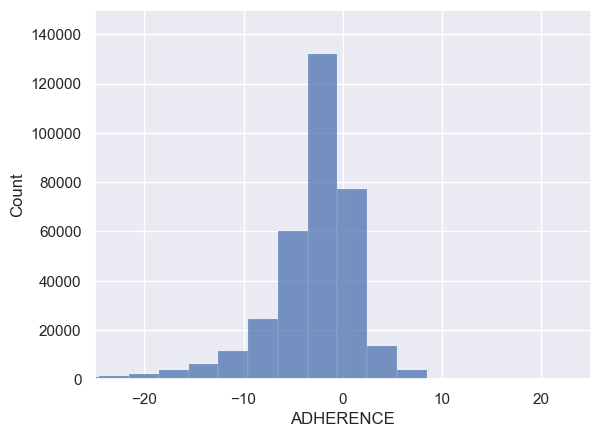

In [16]:
#Overall distribution of adherence
sns.set_theme(style="darkgrid")
sns.histplot(data=wego, x="ADHERENCE", binwidth=3)
plt.ylim(0, 150000)
plt.xlim(-25, 25)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


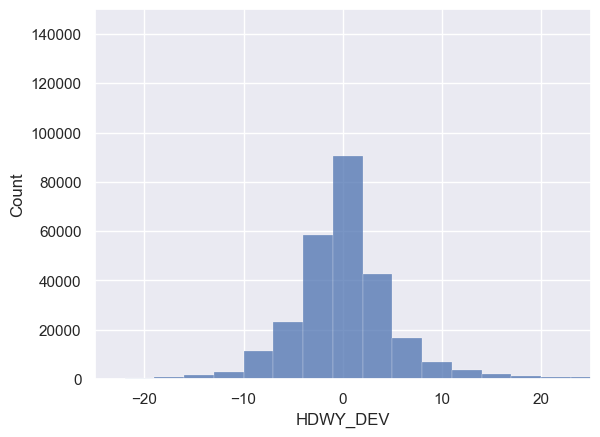

In [17]:
#Overall distribution of adherence
sns.set_theme(style="darkgrid")
sns.histplot(data=wego, x="HDWY_DEV", binwidth=3)
plt.ylim(0, 150000)
plt.xlim(-25, 25)
plt.show()

In [18]:
wego['hdwy_dev_pct'] = (wego['HDWY_DEV']/wego['SCHEDULED_HDWY'])*100

In [19]:
wego = wego.dropna(subset=['hdwy_dev_pct'])
wego.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,hdwy_dev_pct
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,0,0,1,0,0.0,0,13.216666,10.0,Bordeaux,7.619046
8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,5.619046
9,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,-3.222227
11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,...,0,0,1,0,0.0,0,10.800000,5.0,Bordeaux,-14.444447
12,120230801,1,99457902,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,...,1,0,0,0,0.0,0,0.000000,NaN,Bordeaux,-25.888893


In [20]:
# Calculating Adherence mean and standard deviation
adh_mean = wego['ADHERENCE'].mean()
adh_std = np.std(wego['ADHERENCE'])

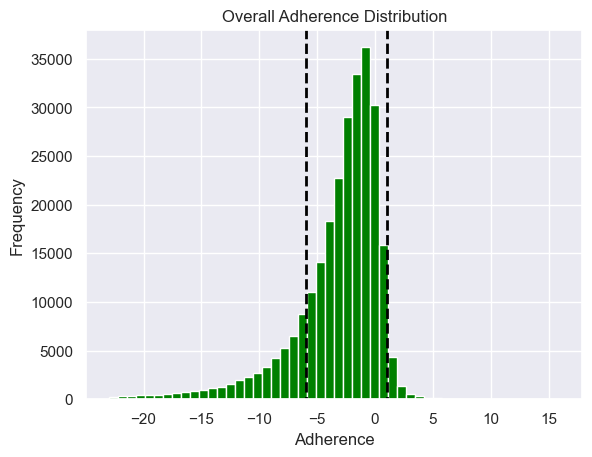

In [21]:
adh_mean_std = (
    wego[wego['ADHERENCE'].between(adh_mean - adh_std*3,
                                   adh_mean + adh_std*3,
                                   inclusive='both')]
    ['ADHERENCE']
    .plot(kind='hist',
          bins=50, color= 'green')
)
adh_mean_std.set(
    title='Overall Adherence Distribution',
    xlabel='Adherence'    )
plt.axvline(linewidth=2, linestyle='--', color='black', x=1, ymin=35000, ymax=0)
plt.axvline(linewidth=2, linestyle='--', color='black', x=-6, ymin=35000, ymax=0)

In [22]:
# Calculating Headway mean and standard deviation
hdwy_mean = wego['HDWY_DEV'].mean()
hdwy_std = np.std(wego['HDWY_DEV'])

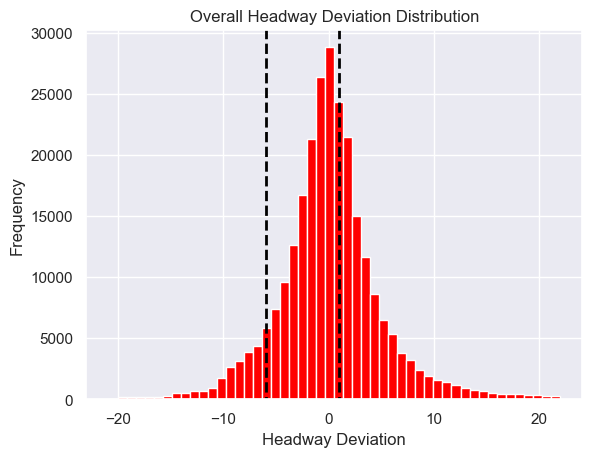

In [23]:
hdwy_mean_std = (
    wego[wego['HDWY_DEV'].between(hdwy_mean - hdwy_std*3,
                                   hdwy_mean + hdwy_std*3,
                                   inclusive='both')]
    ['HDWY_DEV']
    .plot(kind='hist',
          bins=50, color= 'red')
)
hdwy_mean_std.set(
    title='Overall Headway Deviation Distribution',
    xlabel='Headway Deviation')

plt.axvline(linewidth=2, linestyle='--', color='black', x=1, ymin=35000, ymax=0)
plt.axvline(linewidth=2, linestyle='--', color='black', x=-6, ymin=35000, ymax=0)

### 2) How does direction of travel, route, or location affect the headway and on-time performance?

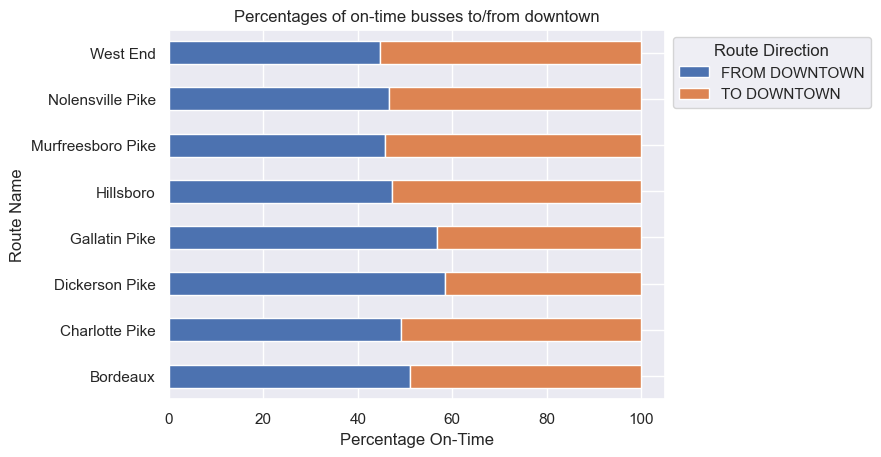

In [24]:
wego_pct = (wego.groupby(['ROUTE_NAME','ROUTE_DIRECTION_NAME'])['ADJUSTED_ONTIME_COUNT'].sum()/wego.groupby(['ROUTE_NAME'])['ADJUSTED_ONTIME_COUNT'].sum())*100
wego_pct.unstack().plot.barh(stacked=True)
plt.ylabel('Route Name')
plt.title('Percentages of on-time busses to/from downtown')
plt.legend(title = 'Route Direction', bbox_to_anchor=(1, 1))
plt.xlabel('Percentage On-Time')
plt.xticks()
plt.show()

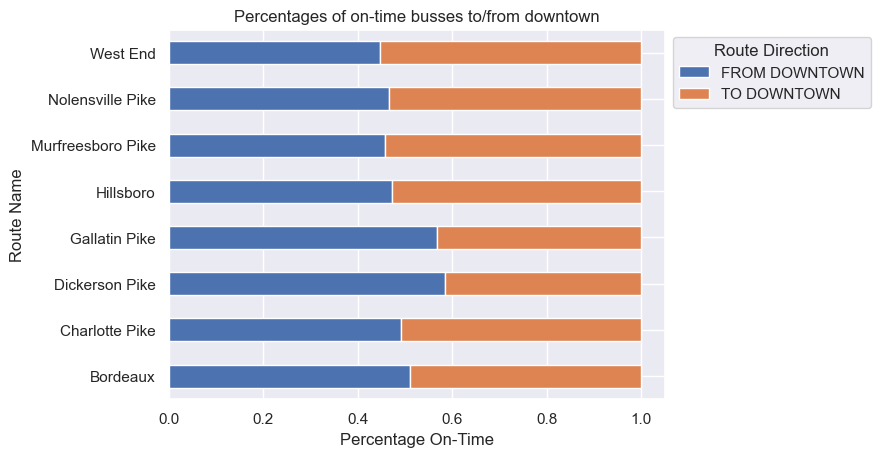

In [25]:
#Create a stacked bar chart showing the percentages of on-time busses to vs. from downtown
wego_pct = (wego.groupby(['ROUTE_NAME','ROUTE_DIRECTION_NAME'])['ADJUSTED_ONTIME_COUNT'].sum()/wego.groupby(['ROUTE_NAME'])['ADJUSTED_ONTIME_COUNT'].sum())
wego_pct.unstack().plot.barh(stacked=True)
plt.ylabel('Route Name')
plt.title('Percentages of on-time busses to/from downtown')
plt.legend(title = 'Route Direction', bbox_to_anchor=(1, 1))
plt.xlabel('Percentage On-Time')
plt.xticks()
plt.show()


array([<Axes: title={'center': 'FROM DOWNTOWN'}, ylabel='ROUTE_NAME'>,
       <Axes: title={'center': 'TO DOWNTOWN'}, ylabel='ROUTE_NAME'>],
      dtype=object)

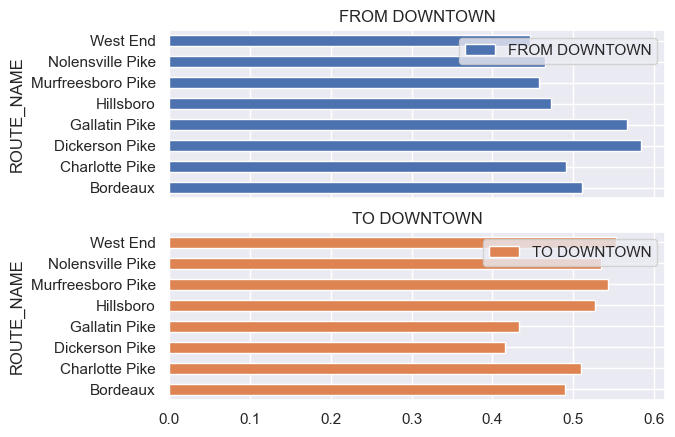

In [26]:
wego_pct.unstack().plot.barh(subplots=True)

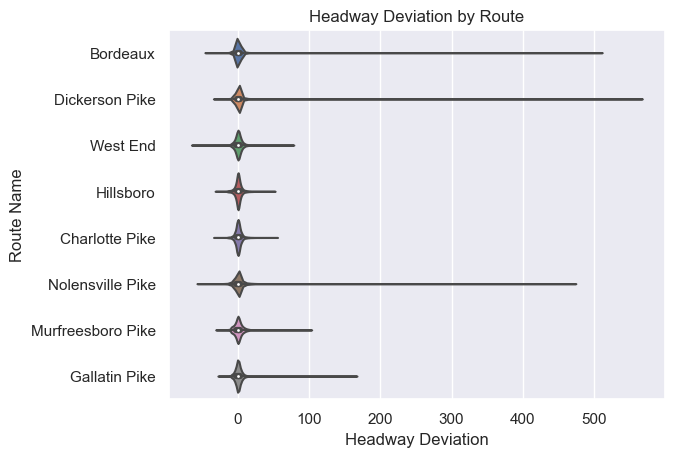

In [27]:
#This violin chart shows the headway deviation between the 8 routes. 
sns.set_theme(style="darkgrid")
sns.violinplot(x=wego['HDWY_DEV'], y=wego['ROUTE_NAME'])
plt.ylabel('Route Name')
plt.xlabel('Headway Deviation')
plt.title('Headway Deviation by Route')
plt.show()
#Notice the gapping is much more pronounced overall

In [28]:
wego.columns

Index(['CALENDAR_ID', 'SERVICE_ABBR', 'ADHERENCE_ID', 'DATE', 'ROUTE_ABBR',
       'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'OVERLOAD_ID',
       'ROUTE_DIRECTION_NAME', 'TIME_POINT_ABBR', 'ROUTE_STOP_SEQUENCE',
       'TRIP_EDGE', 'LATITUDE', 'LONGITUDE', 'SCHEDULED_TIME',
       'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
       'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV', 'ADJUSTED_EARLY_COUNT',
       'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT', 'STOP_CANCELLED',
       'PREV_SCHED_STOP_CANCELLED', 'IS_RELIEF', 'DWELL_IN_MINS',
       'SCHEDULED_LAYOVER_MINUTES', 'ROUTE_NAME', 'hdwy_dev_pct'],
      dtype='object')

In [29]:
#Create table with just the columns related to route and direction of travel
x = wego[['ROUTE_ABBR', 'ADJUSTED_ONTIME_COUNT','ROUTE_DIRECTION_NAME','ROUTE_NAME']].groupby(['ROUTE_ABBR'])[['ADJUSTED_ONTIME_COUNT','ROUTE_DIRECTION_NAME','ROUTE_NAME']]\
                                                        .value_counts()\
                                                        .reset_index(name = 'count')\
                                                        .sort_values(['ROUTE_ABBR'])
x.head()

,ROUTE_ABBR,ADJUSTED_ONTIME_COUNT,ROUTE_DIRECTION_NAME,ROUTE_NAME,count
0,3,1,TO DOWNTOWN,West End,15527
1,3,1,FROM DOWNTOWN,West End,12550
2,3,0,FROM DOWNTOWN,West End,5732
3,3,0,TO DOWNTOWN,West End,2774
4,7,1,TO DOWNTOWN,Hillsboro,4884


In [30]:
#create custom function that filters on route number and sums all related counts (to get the total number of trips)
def filter_by_route(num):
    filtered_list_by_route = x[x['ROUTE_ABBR']==num]
    totals = filtered_list_by_route['count'].sum()
    return totals

#test custom function:  
filter_by_route(3)

36583

In [31]:
#create for loop that itterates over rows to determine percentage of each variable's count over total trips
percentage = []
for index, row in x.iterrows():
    route_total = filter_by_route(x['ROUTE_ABBR'][index])
    perc = round((x['count'][index]/route_total*100),2)
    percentage.append(perc)

x['percentage'] = percentage
x.head(8)

,ROUTE_ABBR,ADJUSTED_ONTIME_COUNT,ROUTE_DIRECTION_NAME,ROUTE_NAME,count,percentage
0,3,1,TO DOWNTOWN,West End,15527,42.44
1,3,1,FROM DOWNTOWN,West End,12550,34.31
2,3,0,FROM DOWNTOWN,West End,5732,15.67
3,3,0,TO DOWNTOWN,West End,2774,7.58
4,7,1,TO DOWNTOWN,Hillsboro,4884,42.18
5,7,1,FROM DOWNTOWN,Hillsboro,4380,37.83
6,7,0,FROM DOWNTOWN,Hillsboro,1505,13.00
7,7,0,TO DOWNTOWN,Hillsboro,809,6.99


In [32]:
#Filter each variable (later var_df)

#on time or not?
on_time = x[x['ADJUSTED_ONTIME_COUNT']==1]
not_on_time = x[x['ADJUSTED_ONTIME_COUNT']==0]

#route direction
to_downtown = x[x['ROUTE_DIRECTION_NAME']=='TO DOWNTOWN']
from_downtown = x[x['ROUTE_DIRECTION_NAME']=='FROM DOWNTOWN']

#cross_ref timeliness and route direction:
on_time_to_downtown = on_time[on_time['ROUTE_DIRECTION_NAME']=='TO DOWNTOWN']
on_time_from_downtown = on_time[on_time['ROUTE_DIRECTION_NAME']=='FROM DOWNTOWN']
not_on_time_to_downtown = not_on_time[not_on_time['ROUTE_DIRECTION_NAME']=='TO DOWNTOWN']
not_on_time_from_downtown = not_on_time[not_on_time['ROUTE_DIRECTION_NAME']=='FROM DOWNTOWN']

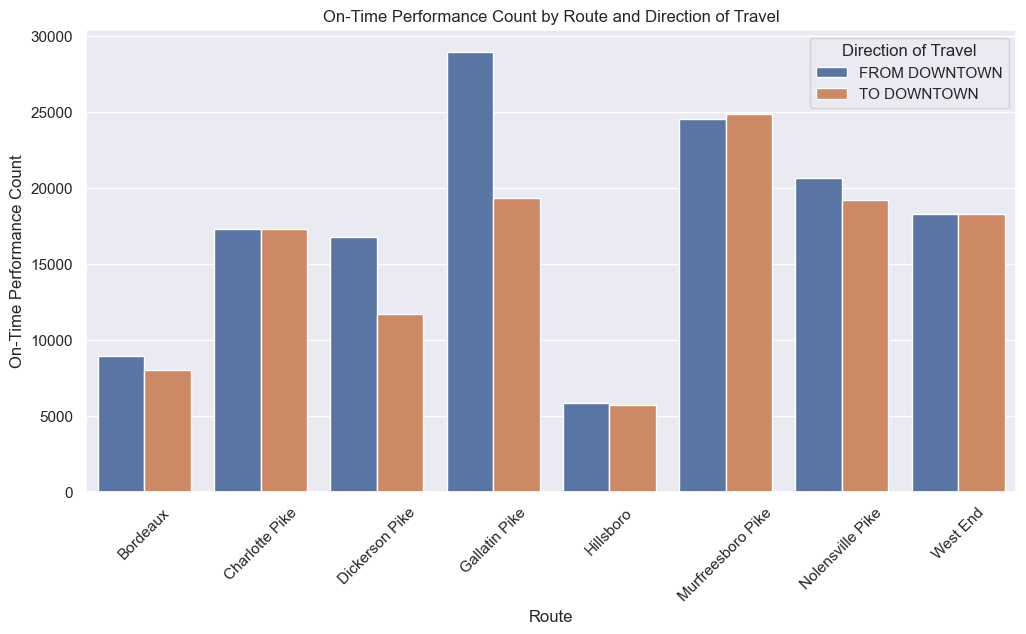

In [33]:
each_route_with_counts_on_time_and_direction = wego[['ROUTE_NAME', 'ADJUSTED_ONTIME_COUNT', 'ROUTE_DIRECTION_NAME']].groupby(['ROUTE_NAME', 'ROUTE_DIRECTION_NAME']).count().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=each_route_with_counts_on_time_and_direction, x='ROUTE_NAME', y='ADJUSTED_ONTIME_COUNT', hue='ROUTE_DIRECTION_NAME')
plt.title('On-Time Performance Count by Route and Direction of Travel')
plt.xlabel('Route')
plt.ylabel('On-Time Performance Count')
plt.xticks(rotation=45)
plt.legend(title='Direction of Travel')
plt.show()
#This is direction of travel effect on on time performance by route number

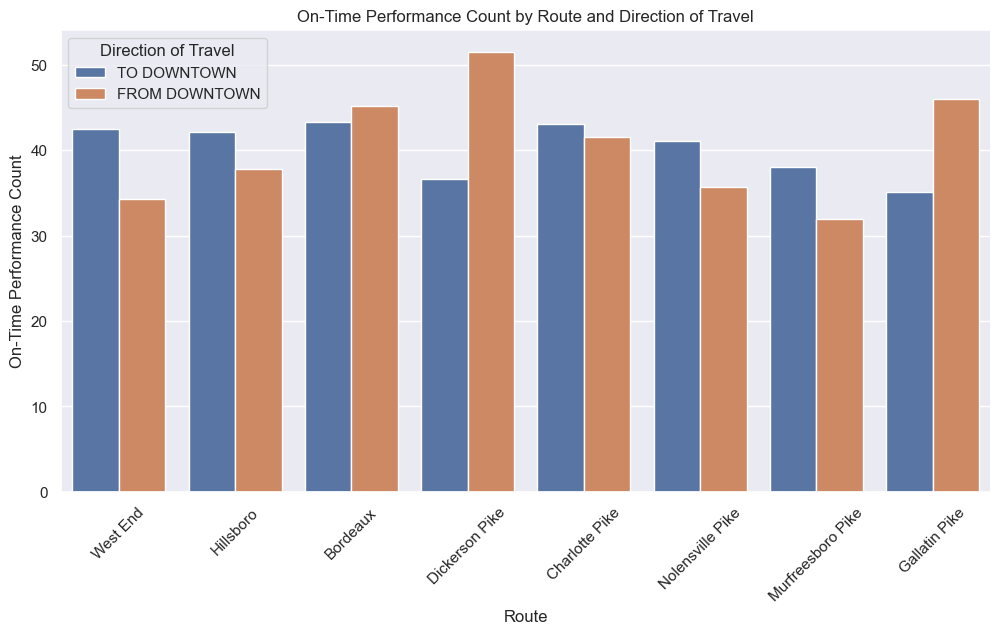

In [34]:
plt.figure(figsize=(12, 6))
sns.barplot(data=on_time, x='ROUTE_NAME', y='percentage', hue='ROUTE_DIRECTION_NAME')
plt.title('On-Time Performance Count by Route and Direction of Travel')
plt.xlabel('Route')
plt.ylabel('On-Time Performance Count')
plt.xticks(rotation=45)
plt.legend(title='Direction of Travel')
plt.show()
#This is direction of travel effect on percentage of time performance by route number

In [35]:
on_time_to_downtown

,ROUTE_ABBR,ADJUSTED_ONTIME_COUNT,ROUTE_DIRECTION_NAME,ROUTE_NAME,count,percentage
0,3,1,TO DOWNTOWN,West End,15527,42.44
4,7,1,TO DOWNTOWN,Hillsboro,4884,42.18
9,22,1,TO DOWNTOWN,Bordeaux,7374,43.36
13,23,1,TO DOWNTOWN,Dickerson Pike,10440,36.66
16,50,1,TO DOWNTOWN,Charlotte Pike,14920,43.13
20,52,1,TO DOWNTOWN,Nolensville Pike,16375,41.05
24,55,1,TO DOWNTOWN,Murfreesboro Pike,18789,38.01
29,56,1,TO DOWNTOWN,Gallatin Pike,17000,35.17


In [36]:
#Create labeling function
def get_labels(var_df):
    labels = []
    for index,row in var_df.iterrows():
        route_name = var_df['ROUTE_NAME'][index]
        labels.append(route_name)
    return labels
#test function
get_labels(on_time_to_downtown)

['West End',
 'Hillsboro',
 'Bordeaux',
 'Dickerson Pike',
 'Charlotte Pike',
 'Nolensville Pike',
 'Murfreesboro Pike',
 'Gallatin Pike']

In [37]:
to_downtown

,ROUTE_ABBR,ADJUSTED_ONTIME_COUNT,ROUTE_DIRECTION_NAME,ROUTE_NAME,count,percentage
0,3,1,TO DOWNTOWN,West End,15527,42.44
3,3,0,TO DOWNTOWN,West End,2774,7.58
4,7,1,TO DOWNTOWN,Hillsboro,4884,42.18
7,7,0,TO DOWNTOWN,Hillsboro,809,6.99
9,22,1,TO DOWNTOWN,Bordeaux,7374,43.36
11,22,0,TO DOWNTOWN,Bordeaux,686,4.03
15,23,0,TO DOWNTOWN,Dickerson Pike,1255,4.41
13,23,1,TO DOWNTOWN,Dickerson Pike,10440,36.66
16,50,1,TO DOWNTOWN,Charlotte Pike,14920,43.13
19,50,0,TO DOWNTOWN,Charlotte Pike,2388,6.90


In [38]:
#define a function that filters any df by specific value(s) in a column
def filter_df(df, column, *values):
    return df[df[column].isin(values)]



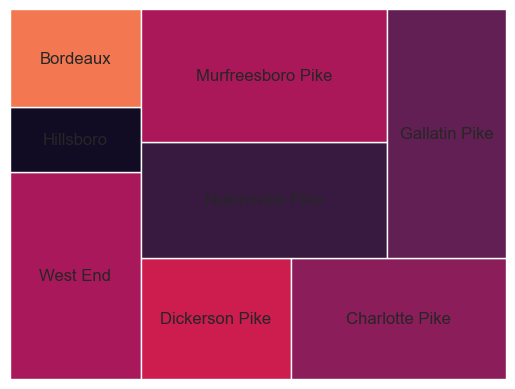

In [39]:
#Create tree map
def tree_map(var_df,column):
    squarify.plot(var_df[column], label=get_labels(var_df))
    plt.axis('off')
    plt.show()

tree_map(on_time_to_downtown,'count')
#This ended up not being as useful, but I'm saving the code here in case I need it later

In [40]:
#There are 334 unique operators (bus drivers)
wego.OPERATOR.nunique()

334

In [41]:
#count total number of buses per hour
driver_total_buses_in_same_hour = wego.groupby(['OPERATOR'])['OPERATOR'].count().reset_index(name='total_buses_per_driver')
#sum on_time buses per hour
driver_on_time_buses_in_same_hour = wego.groupby(['OPERATOR'])['ADJUSTED_ONTIME_COUNT'].sum().reset_index(name='total_on_time_buses_per_driver')

#merge the on_time and total buses per hour into single dataframe and rename columns
driver_pct_buses_on_time = pd.merge(driver_on_time_buses_in_same_hour, driver_total_buses_in_same_hour)
driver_pct_buses_on_time = driver_pct_buses_on_time.rename(columns={'total_on_time_buses_per_driver': 'on_time', 'total_buses_per_driver': 'total'})
driver_pct_buses_on_time

#add new column to calculate percentage buses that were on time in each hour time-frame
driver_pct_buses_on_time['driver_pct_on_time'] = round(((driver_pct_buses_on_time.on_time/driver_pct_buses_on_time.total)*100),2)
driver_pct_buses_on_time = driver_pct_buses_on_time.sort_values(by='driver_pct_on_time', ascending=False)
driver_pct_buses_on_time = driver_pct_buses_on_time.loc[driver_pct_buses_on_time['driver_pct_on_time'] != 0]
driver_pct_buses_on_time


,OPERATOR,on_time,total,driver_pct_on_time
0,56,2,2,100.00
173,2256,4,4,100.00
207,2472,20,20,100.00
194,2377,7,7,100.00
184,2338,21,21,100.00
...,...,...,...,...
331,3165,8,24,33.33
31,1016,38,115,33.04
196,2400,22,69,31.88
149,2094,7,32,21.88


In [42]:
on_time_driver_stats_overall = driver_pct_buses_on_time.driver_pct_on_time.describe()
on_time_driver_stats_overall

count    333.000000
mean      77.651502
std       13.975281
min        5.260000
25%       71.430000
50%       80.080000
75%       86.900000
max      100.000000
Name: driver_pct_on_time, dtype: float64

<Axes: xlabel='total', ylabel='driver_pct_on_time'>

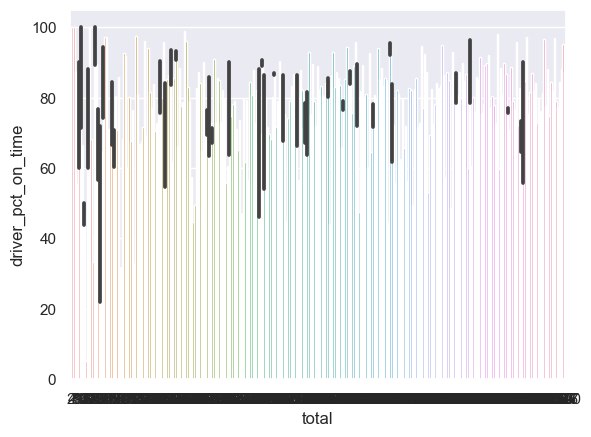

In [43]:
sns.barplot( x=driver_pct_buses_on_time["total"], y=driver_pct_buses_on_time["driver_pct_on_time"] )


<Axes: xlabel='total', ylabel='driver_pct_on_time'>

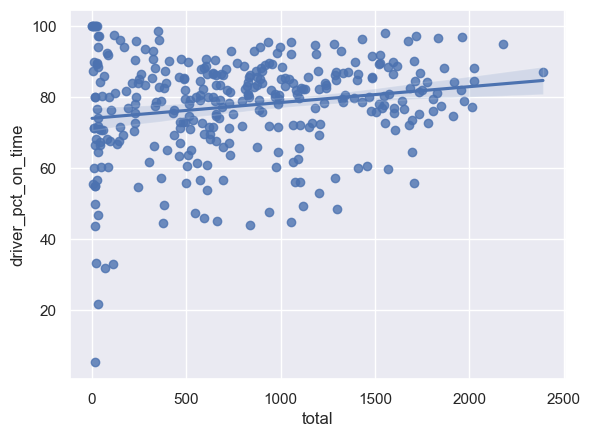

In [44]:
sns.regplot(x=driver_pct_buses_on_time['total'], y=driver_pct_buses_on_time['driver_pct_on_time'])

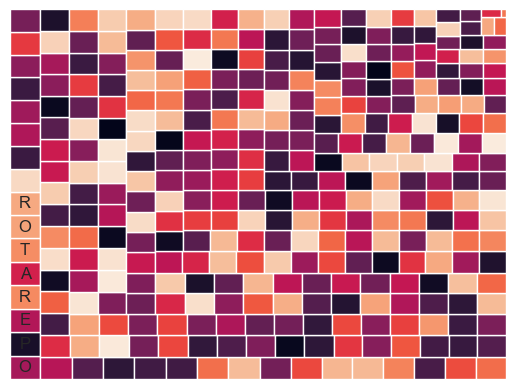

In [45]:
labels = []
for index,row in driver_pct_buses_on_time.iterrows():
    driver_num = driver_pct_buses_on_time['OPERATOR'][index]
    labels.append(driver_num)

squarify.plot(driver_pct_buses_on_time['driver_pct_on_time'], label='OPERATOR')
plt.axis('off')
plt.show()

### For the location variable: 
##### These are the coordinates fo the center of nashville: 
    36.1627° N, 86.7816° Wa
    

In [46]:
bus_stops = wego[['ROUTE_NAME','ROUTE_ABBR', 'ROUTE_STOP_SEQUENCE','ADHERENCE','HDWY_DEV','ADJUSTED_ONTIME_COUNT','LATITUDE','LONGITUDE']]
bus_stops.head()

,ROUTE_NAME,ROUTE_ABBR,ROUTE_STOP_SEQUENCE,ADHERENCE,HDWY_DEV,ADJUSTED_ONTIME_COUNT,LATITUDE,LONGITUDE
7,Bordeaux,22,14.0,-1.716666,2.666666,1,36.181248,-86.847705
8,Bordeaux,22,10.0,-1.916666,1.966666,1,36.193454,-86.839981
9,Bordeaux,22,5.0,-0.183333,-0.483334,1,36.182177,-86.814445
11,Bordeaux,22,1.0,-1.316666,-2.166667,1,36.167091,-86.781923
12,Bordeaux,22,5.0,1.500000,-3.883334,0,36.183480,-86.814220


In [47]:
#Nashville centerpoint coordinates:
center_lat = 36.1627
center_lon = -86.7816

#for loop to categorize each bus stop: 
#north or south

north_south = []
for index, row in bus_stops.iterrows():
    if bus_stops['LATITUDE'][index] >= center_lat:
            north_south.append('north')
    else:
            north_south.append('south')

bus_stops['north_south'] = pd.Series(north_south)

#east or west

east_west = []
for index, row in bus_stops.iterrows():
    if bus_stops['LONGITUDE'][index] >= center_lon:
            east_west.append('east')
    else:
            east_west.append('west')

bus_stops['east_west'] = pd.Series(east_west)

bus_stops.head()


/var/folders/9p/b296_brx68g11r3xrqpfbh6w0000gn/T/ipykernel_16579/1802049037.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bus_stops['north_south'] = pd.Series(north_south)
/var/folders/9p/b296_brx68g11r3xrqpfbh6w0000gn/T/ipykernel_16579/1802049037.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bus_stops['east_west'] = pd.Series(east_west)


,ROUTE_NAME,ROUTE_ABBR,ROUTE_STOP_SEQUENCE,ADHERENCE,HDWY_DEV,ADJUSTED_ONTIME_COUNT,LATITUDE,LONGITUDE,north_south,east_west
7,Bordeaux,22,14.0,-1.716666,2.666666,1,36.181248,-86.847705,north,west
8,Bordeaux,22,10.0,-1.916666,1.966666,1,36.193454,-86.839981,north,west
9,Bordeaux,22,5.0,-0.183333,-0.483334,1,36.182177,-86.814445,north,west
11,Bordeaux,22,1.0,-1.316666,-2.166667,1,36.167091,-86.781923,north,west
12,Bordeaux,22,5.0,1.500000,-3.883334,0,36.183480,-86.814220,north,west


In [48]:
ns =bus_stops.groupby(['north_south']).size().reset_index(name='count')
ns

,north_south,count
0,north,86139
1,south,115996


In [49]:
ew = bus_stops.groupby(['east_west']).size().reset_index(name='count')
ew

,east_west,count
0,east,112916
1,west,89219


### 3) How does time of day or day of week affect headway and on-time performance?

#### Relevent Columns:
 - SERVICE_ABBR: Service Type. indicates the schedule type operating that day. 1 = Weekday, 2 = Saturday, 3 = Sunday. Normally this corresponds to the day of the week, but sometimes Saturday or Sunday service will run on a weekday (i.e. during a holiday).  
 - DATE: Trip date  
 - TRIP_ID: Identifies the trip; Note that a TRIP_ID is reused for the a given route and scheduled time, so it does not uniquely identify a trip, but can be used in combination with the CALENDAR_ID.  
 - TIME_POINT_ABBR: Identifies the time point of the record.  
 - ADHERENCE: Difference between actual departure time and scheduled time; negative indicates departure time after scheduled time and positive indicates departure time before scheduled time. Generally, on-time is considered to be no more than 6 minutes lates and no more than one minute early, but there are some exceptions to these cutoffs. Whether or not a bus is on-time can be determined by looking at the ADJUSTED_EARLY_COUNT, ADJUSTED_LATE_COUNT, and ADJUSTED_ONTIME_COUNT columns.  
 - HDWY_DEV: calculates headway deviation in minutes as the difference between actual and scheduled headway. Negative values indicate a shorter headway than scheduled (i.e. bunching) and positive values indicate a longer headway than scheduled (i.e. gapping)  

<font color=red>Filter Out:</font>  
 - <font color=red>OVERLOAD_ID: signifies that the record is from a trip that was added by the dispatcher and was not part of the original schedule for the day. Usually, these are created when one vehicle breaks down and another is covering the same service. As far as the actual value, 0 means that this record was part of the original schedule, and anything other than 0 means it was added.</font>  
 - <font color=red>PREV_SCHED_STOP_CANCELLED: flags whether the previous timepoint crossing was cancelled or waived. Useful for excluding records where the headway values are extremely high because the bus is just coming off a detour  
</font>


In [50]:
#Convert any necessary datetimes
wego['SCHEDULED_TIME'] = pd.to_datetime(wego['SCHEDULED_TIME'])
wego['ACTUAL_ARRIVAL_TIME'] = pd.to_datetime(wego['ACTUAL_ARRIVAL_TIME'])
wego['ACTUAL_DEPARTURE_TIME'] = pd.to_datetime(wego['ACTUAL_DEPARTURE_TIME'])
wego['DATE'] = pd.to_datetime(wego['DATE'], format = 'mixed')

wego.info()

<class 'pandas.core.frame.DataFrame'>
Index: 265890 entries, 7 to 350327
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   CALENDAR_ID                265890 non-null  int64         
 1   SERVICE_ABBR               265890 non-null  int64         
 2   ADHERENCE_ID               265890 non-null  int64         
 3   DATE                       265890 non-null  datetime64[ns]
 4   ROUTE_ABBR                 265890 non-null  int64         
 5   BLOCK_ABBR                 265890 non-null  int64         
 6   OPERATOR                   265890 non-null  int64         
 7   TRIP_ID                    265890 non-null  int64         
 8   OVERLOAD_ID                265890 non-null  int64         
 9   ROUTE_DIRECTION_NAME       265890 non-null  object        
 10  TIME_POINT_ABBR            265890 non-null  object        
 11  ROUTE_STOP_SEQUENCE        265885 non-null  float64      

#### Day of Week

In [51]:
# Create DAYS_OF_THE_WEEK column
wego['DAYS_OF_THE_WEEK'] = wego['DATE'].dt.day_name()
# Display the updated DataFrame
print(wego[['DATE', 'DAYS_OF_THE_WEEK']].head())

         DATE DAYS_OF_THE_WEEK
7  2023-08-01          Tuesday
8  2023-08-01          Tuesday
9  2023-08-01          Tuesday
11 2023-08-01          Tuesday
12 2023-08-01          Tuesday


In [52]:
#define a variable that stores average headway deviation for each day of the week:
day_of_week_stats_hdwy = wego.groupby('DAYS_OF_THE_WEEK')['HDWY_DEV'].mean().reset_index().sort_values(by='DAYS_OF_THE_WEEK', ascending=False)

#reorder the week days so that they are in order: 
week_days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
day_of_week_stats_hdwy['DAYS_OF_THE_WEEK'] = pd.Categorical(day_of_week_stats_hdwy['DAYS_OF_THE_WEEK'], categories=week_days, ordered=True)
day_of_week_stats_hdwy = day_of_week_stats_hdwy.sort_values('DAYS_OF_THE_WEEK')
day_of_week_stats_hdwy

,DAYS_OF_THE_WEEK,HDWY_DEV
3,Sunday,0.967552
1,Monday,0.283829
5,Tuesday,0.385643
6,Wednesday,0.378740
4,Thursday,0.534189
0,Friday,0.669558
2,Saturday,0.645084


In [53]:
day_of_week_stats_hdwy.head(7)

,DAYS_OF_THE_WEEK,HDWY_DEV
3,Sunday,0.967552
1,Monday,0.283829
5,Tuesday,0.385643
6,Wednesday,0.378740
4,Thursday,0.534189
0,Friday,0.669558
2,Saturday,0.645084


In [54]:
day_of_week_stats_hdwy

,DAYS_OF_THE_WEEK,HDWY_DEV
3,Sunday,0.967552
1,Monday,0.283829
5,Tuesday,0.385643
6,Wednesday,0.378740
4,Thursday,0.534189
0,Friday,0.669558
2,Saturday,0.645084


/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


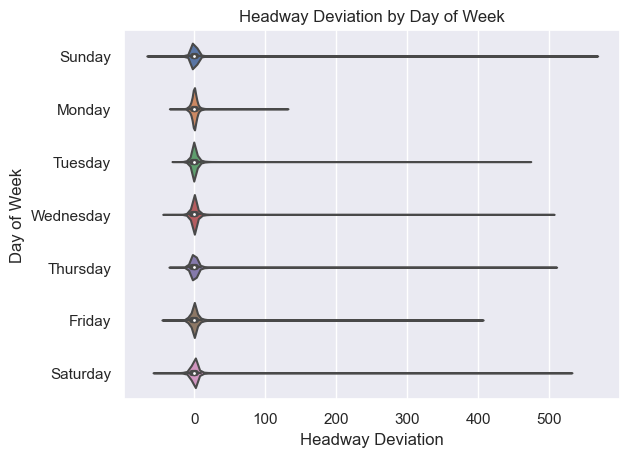

In [55]:
#define a variable that stores average headway deviation for each day of the week:
day_of_week_stats_hdwy = wego.groupby('DAYS_OF_THE_WEEK')['HDWY_DEV'].mean().reset_index().sort_values(by='DAYS_OF_THE_WEEK', ascending=False)

#reorder the week days so that they are in order: 
week_days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
wego['DAYS_OF_THE_WEEK'] = pd.Categorical(wego['DAYS_OF_THE_WEEK'], categories=week_days, ordered=True)
wego = wego.sort_values('DAYS_OF_THE_WEEK')
wego.head()

#This violin chart shows the headway deviation between the 8 routes. 
#days_of_week_sorted = wego.groupby('DAYS_OF_THE_WEEK')['HDWY_DEV'].reset_index().sort_values(by='DAYS_OF_THE_WEEK', ascending=False)
sns.set_theme(style="darkgrid")
sns.violinplot(x=wego['HDWY_DEV'], y=wego['DAYS_OF_THE_WEEK'])
plt.xlabel('Headway Deviation')
plt.ylabel('Day of Week')
plt.title('Headway Deviation by Day of Week')
plt.show()
#Notice the gapping is much more pronounced overall


In [56]:
#Calculates percentage
#Boolean conditional that targets the acceptable ranges for each positive and negative headway
#Headway deviation divided by scheduled headway

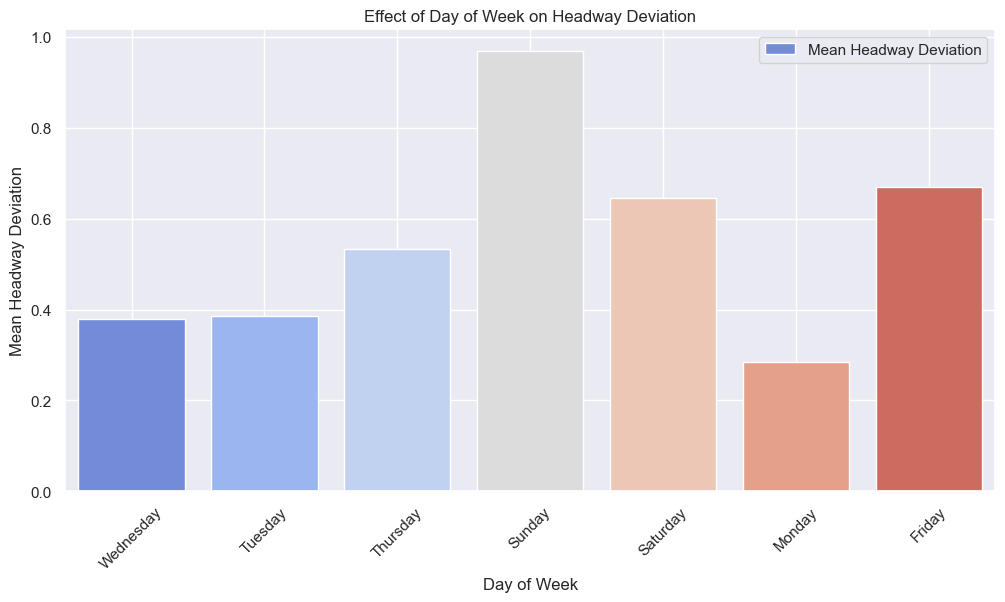

In [57]:
#Plot average headway deviation by day of the week
plt.figure(figsize=(12, 6))
sns.barplot(data=day_of_week_stats_hdwy, x='DAYS_OF_THE_WEEK', y='HDWY_DEV', label='Mean Headway Deviation', palette='coolwarm')
plt.title('Effect of Day of Week on Headway Deviation')
plt.xlabel('Day of Week')
plt.ylabel('Mean Headway Deviation')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

Observation: Sundays have a much higher average headway deviation than other days (lots of late busses)

#### Time of Day

In [58]:
#Add a column for hour of the day
wego['datehour'] = wego['SCHEDULED_TIME'].dt.hour
#wego['datehour'] = wego['datehour'].astype(int)
wego.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,hdwy_dev_pct,DAYS_OF_THE_WEEK,datehour
311018,120230924,3,100217522,2023-09-24,3,311,1788,351145,0,TO DOWNTOWN,...,1,0,0.0,0,0.00,NaN,West End,0.784312,Sunday,10
152474,120230827,3,100200961,2023-08-27,50,5000,3116,351692,0,FROM DOWNTOWN,...,1,0,0.0,0,0.00,NaN,Charlotte Pike,-6.833335,Sunday,17
152473,120230827,3,100200960,2023-08-27,50,5000,3116,351692,0,FROM DOWNTOWN,...,1,0,0.0,0,18.35,10.0,Charlotte Pike,12.250000,Sunday,17
152471,120230827,3,100200958,2023-08-27,50,5000,3116,351691,0,TO DOWNTOWN,...,1,0,0.0,0,0.00,NaN,Charlotte Pike,-1.666670,Sunday,16
152470,120230827,3,100200957,2023-08-27,50,5000,3116,351691,0,TO DOWNTOWN,...,1,0,0.0,0,0.00,NaN,Charlotte Pike,-4.250000,Sunday,16


In [59]:
#Time of day histograms: bin by morning, afternoon, evening, and late night/early morning 
#X-axis = hour of day
#y-axis = headway deviation or adherance (percentage)

In [60]:
wego.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,hdwy_dev_pct,DAYS_OF_THE_WEEK,datehour
311018,120230924,3,100217522,2023-09-24,3,311,1788,351145,0,TO DOWNTOWN,...,1,0,0.0,0,0.00,NaN,West End,0.784312,Sunday,10
152474,120230827,3,100200961,2023-08-27,50,5000,3116,351692,0,FROM DOWNTOWN,...,1,0,0.0,0,0.00,NaN,Charlotte Pike,-6.833335,Sunday,17
152473,120230827,3,100200960,2023-08-27,50,5000,3116,351692,0,FROM DOWNTOWN,...,1,0,0.0,0,18.35,10.0,Charlotte Pike,12.250000,Sunday,17
152471,120230827,3,100200958,2023-08-27,50,5000,3116,351691,0,TO DOWNTOWN,...,1,0,0.0,0,0.00,NaN,Charlotte Pike,-1.666670,Sunday,16
152470,120230827,3,100200957,2023-08-27,50,5000,3116,351691,0,TO DOWNTOWN,...,1,0,0.0,0,0.00,NaN,Charlotte Pike,-4.250000,Sunday,16


In [61]:
#count total number of buses per day of week
total_buses_in_same_hour = wego.groupby(['datehour'])['datehour'].sum().reset_index(name='total_buses_per_day')

In [62]:

#sum on_time buses per hour
on_time_buses_in_same_hour = wego.groupby(['DAYS_OF_THE_WEEK'])['ADJUSTED_ONTIME_COUNT'].sum().reset_index(name='total_on_time_buses_per_day')

/var/folders/9p/b296_brx68g11r3xrqpfbh6w0000gn/T/ipykernel_16579/3803330361.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  on_time_buses_in_same_hour = wego.groupby(['DAYS_OF_THE_WEEK'])['ADJUSTED_ONTIME_COUNT'].sum().reset_index(name='total_on_time_buses_per_day')


In [63]:
#count total number of buses per day of week
total_buses_in_same_hour = wego.groupby(['DAYS_OF_THE_WEEK'])['DAYS_OF_THE_WEEK'].count().reset_index(name='total_buses_per_day')
#sum on_time buses per hour
on_time_buses_in_same_hour = wego.groupby(['DAYS_OF_THE_WEEK'])['ADJUSTED_ONTIME_COUNT'].sum().reset_index(name='total_on_time_buses_per_day')

#merge the on_time and total buses per hour into single dataframe and rename columns
pct_buses_on_time = pd.merge(on_time_buses_in_same_hour, total_buses_in_same_hour)
pct_buses_on_time = pct_buses_on_time.rename(columns={'total_on_time_buses_per_day': 'on_time', 'total_buses_per_day': 'total'})
pct_buses_on_time

#add new column to calculate percentage buses that were on time in each hour time-frame
pct_buses_on_time['pct_on_time'] = round(((pct_buses_on_time.on_time/pct_buses_on_time.total)*100),2)

#define a variable that stores average headway deviation for each day of the week:
day_of_week_stats_adherence = pct_buses_on_time.groupby('DAYS_OF_THE_WEEK')['pct_on_time'].mean().reset_index().sort_values(by='DAYS_OF_THE_WEEK', ascending=False)

#resort days of week
week_days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
day_of_week_stats_adherence['DAYS_OF_THE_WEEK'] = pd.Categorical(day_of_week_stats_adherence['DAYS_OF_THE_WEEK'], categories=week_days, ordered=True)
day_of_week_stats_adherence = day_of_week_stats_adherence.sort_values('DAYS_OF_THE_WEEK')
day_of_week_stats_adherence


/var/folders/9p/b296_brx68g11r3xrqpfbh6w0000gn/T/ipykernel_16579/670807775.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_buses_in_same_hour = wego.groupby(['DAYS_OF_THE_WEEK'])['DAYS_OF_THE_WEEK'].count().reset_index(name='total_buses_per_day')
/var/folders/9p/b296_brx68g11r3xrqpfbh6w0000gn/T/ipykernel_16579/670807775.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  on_time_buses_in_same_hour = wego.groupby(['DAYS_OF_THE_WEEK'])['ADJUSTED_ONTIME_COUNT'].sum().reset_index(name='total_on_time_buses_per_day')
/var/folders/9p/b296_brx68g11r3xrqpfbh6w0000gn/T/ipykernel_16579/670807775.py:15: FutureW

,DAYS_OF_THE_WEEK,pct_on_time
0,Sunday,84.37
1,Monday,83.57
2,Tuesday,80.11
3,Wednesday,78.97
4,Thursday,78.34
5,Friday,75.01
6,Saturday,78.61


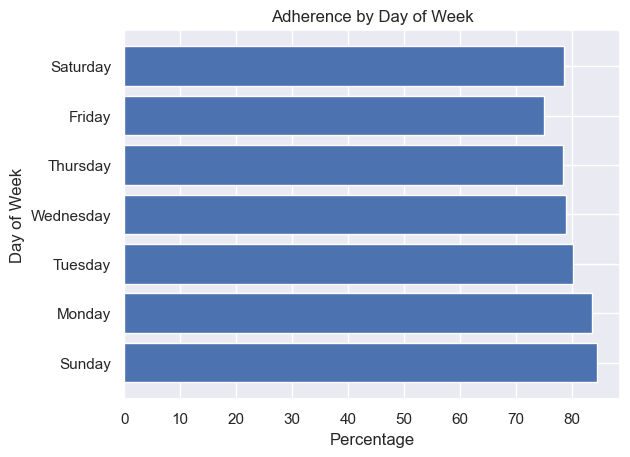

In [64]:
height = day_of_week_stats_adherence['pct_on_time']
bars = day_of_week_stats_adherence['DAYS_OF_THE_WEEK']
x_pos = np.arange(len(bars))


# Create bars
plt.barh(y=day_of_week_stats_adherence['DAYS_OF_THE_WEEK'], width=day_of_week_stats_adherence['pct_on_time'])


# Create names on the x-axis
#plt.xticks(x_pos, bars)
plt.xlabel('Percentage')
plt.ylabel('Day of Week')
plt.title('Adherence by Day of Week')

# Show graphic
plt.show()

In [65]:
#plot the percentage of on time busses per week day
ax = day_of_week_stats.bar(x='DAYS_OF_THE_WEEK',
                    y='pct_on_time',
                    grid=True)

# Add a bold title 
ax.set_title('% buses on time, per day of week',
             weight='bold') 

# Add label names and xticks
ax.set_ylabel('Percentage On-Time')
ax.set_xlabel('Day of Week')

# Show the plot
plt.show()

NameError: name 'day_of_week_stats' is not defined

In [66]:
#count total number of buses per hour
total_buses_in_same_hour = wego.groupby(['datehour'])['datehour'].count().reset_index(name='total_buses_per_hour')
#sum on_time buses per hour
on_time_buses_in_same_hour = wego.groupby(['datehour'])['ADJUSTED_ONTIME_COUNT'].sum().reset_index(name='total_on_time_buses_per_hour')

#merge the on_time and total buses per hour into single dataframe and rename columns
pct_buses_on_time = pd.merge(on_time_buses_in_same_hour, total_buses_in_same_hour)
pct_buses_on_time = pct_buses_on_time.rename(columns={'total_on_time_buses_per_hour': 'on_time', 'total_buses_per_hour': 'total'})
pct_buses_on_time

#add new column to calculate percentage buses that were on time in each hour time-frame
pct_buses_on_time['pct_on_time'] = round(((pct_buses_on_time.on_time/pct_buses_on_time.total)*100),2)
pct_buses_on_time

,datehour,on_time,total,pct_on_time
0,0,1986,2773,71.62
1,1,2,7,28.57
2,4,247,251,98.41
3,5,5448,5900,92.34
4,6,13701,15443,88.72
5,7,13850,17124,80.88
6,8,12444,16477,75.52
7,9,13540,16277,83.18
8,10,13539,15988,84.68
9,11,13587,15970,85.08


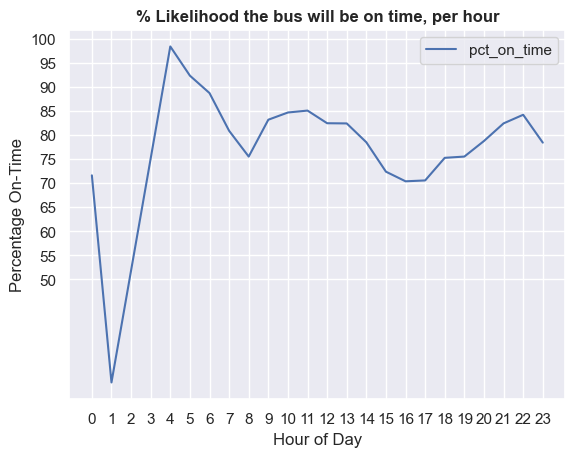

In [67]:
#plot the percentage of on time busses per hour, omitting 
ax = pct_buses_on_time.loc[0:21].plot(x='datehour',
                    y='pct_on_time',
                    grid=True)

# Add a bold title ('\n' allow us to jump rows)
ax.set_title('% Likelihood the bus will be on time, per hour',
             weight='bold') 

# Add label names and xticks
ax.set_ylabel('Percentage On-Time')
ax.set_xlabel('Hour of Day')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
plt.yticks([50,55,60,65,70,75,80,85,90,95,100])

# Show the plot
plt.show()

#### Note: there are no buses scheduled at 2 or 3am
1am buses tend to not be on time

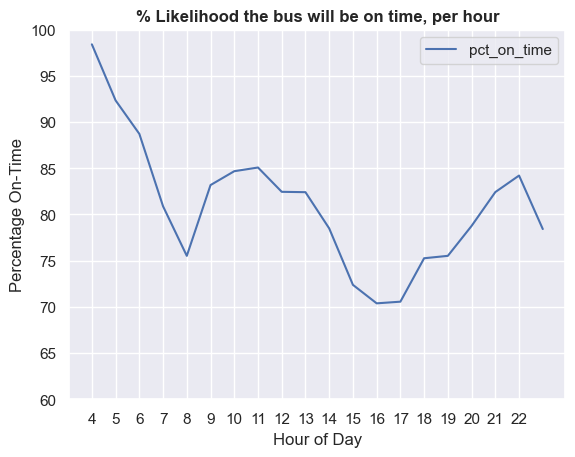

In [68]:
#redo the plot to only show 4am-11pm 
ax = pct_buses_on_time.loc[2:21].plot(x='datehour',
                    y='pct_on_time',
                    grid=True)

# Add a bold title ('\n' allow us to jump rows)
ax.set_title('% Likelihood the bus will be on time, per hour',
             weight='bold') 

# Add label names and xticks
ax.set_ylabel('Percentage On-Time')
ax.set_xlabel('Hour of Day')
plt.xticks([4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22])
plt.yticks([60,65,70,75,80,85,90,95,100])

# Show the plot
plt.show()

#### 8am and 5pm (peak rush hour) are the times when buses are most likely to not be on time
focus on 7-9am and 2pm-8pm (when buses are only 75% likely to be on time. 
3-6pm is especially bad
See if these are related to route direction, route name, or day of week

In [69]:
#Alternative would be to use join, but this requires you to reset the index as the datehour, creating duplicate indices
#x=wego.set_index("datehour").join(pct_buses_on_time.set_index("datehour"))
#x

In [70]:
#Create new dataframe with values from the graph merged in
merged_df = wego.merge(pct_buses_on_time, left_on='datehour', right_on='datehour')
merged_df.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,hdwy_dev_pct,DAYS_OF_THE_WEEK,datehour,on_time,total,pct_on_time
0,120230924,3,100217522,2023-09-24,3,311,1788,351145,0,TO DOWNTOWN,...,0,0.000000,NaN,West End,0.784312,Sunday,10,13539,15988,84.68
1,120230827,3,100200915,2023-08-27,50,5000,2458,351684,0,FROM DOWNTOWN,...,0,0.000000,NaN,Charlotte Pike,-0.833335,Sunday,10,13539,15988,84.68
2,120230827,3,100200914,2023-08-27,50,5000,2458,351684,0,FROM DOWNTOWN,...,0,2.050000,NaN,Charlotte Pike,-4.833335,Sunday,10,13539,15988,84.68
3,120230827,3,100200913,2023-08-27,50,5000,2458,351684,0,FROM DOWNTOWN,...,0,0.000000,NaN,Charlotte Pike,-5.416670,Sunday,10,13539,15988,84.68
4,120230827,3,100200912,2023-08-27,50,5000,2458,351684,0,FROM DOWNTOWN,...,0,16.366666,10.0,Charlotte Pike,10.250000,Sunday,10,13539,15988,84.68


In [71]:
#define a function that filters any df by specific value(s) in a column
def filter_df(df, column, *values):
    return df[df[column].isin(values)]
#test function:
filter_df(merged_df,'datehour', 14,15,16,17,18,19,20)
#note: you can put any number of values or filter on already filtered df's to create more complex filters

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,hdwy_dev_pct,DAYS_OF_THE_WEEK,datehour,on_time,total,pct_on_time
15988,120230827,3,100200961,2023-08-27,50,5000,3116,351692,0,FROM DOWNTOWN,...,0,0.000000,NaN,Charlotte Pike,-6.833335,Sunday,17,11679,16552,70.56
15989,120230827,3,100200960,2023-08-27,50,5000,3116,351692,0,FROM DOWNTOWN,...,0,18.350000,10.0,Charlotte Pike,12.250000,Sunday,17,11679,16552,70.56
15990,120230827,3,100200962,2023-08-27,50,5000,3116,351692,0,FROM DOWNTOWN,...,0,2.533333,NaN,Charlotte Pike,-4.000000,Sunday,17,11679,16552,70.56
15991,120230827,3,100200963,2023-08-27,50,5000,3116,351692,0,FROM DOWNTOWN,...,0,1.783333,NaN,Charlotte Pike,-2.166670,Sunday,17,11679,16552,70.56
15992,120230827,3,100200964,2023-08-27,50,5000,3116,351692,0,FROM DOWNTOWN,...,0,1.666666,NaN,Charlotte Pike,-1.000000,Sunday,17,11679,16552,70.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143573,120230923,2,100196341,2023-09-23,56,5602,1824,352866,0,FROM DOWNTOWN,...,0,0.000000,NaN,Gallatin Pike,8.333330,Saturday,19,8135,10772,75.52
143574,120230923,2,100196342,2023-09-23,56,5602,1824,352866,0,FROM DOWNTOWN,...,0,1.733333,NaN,Gallatin Pike,-3.666670,Saturday,19,8135,10772,75.52
143575,120230923,2,100196338,2023-09-23,56,5602,1824,352866,0,FROM DOWNTOWN,...,0,0.000000,NaN,Gallatin Pike,9.416665,Saturday,19,8135,10772,75.52
143576,120230923,2,100196339,2023-09-23,56,5602,1824,352866,0,FROM DOWNTOWN,...,0,0.000000,NaN,Gallatin Pike,0.666665,Saturday,19,8135,10772,75.52


In [72]:
evening_rush_hour = filter_df(merged_df,'datehour', 14,15,16,17,18,19,20)
filter_df(evening_rush_hour,'pct_on_time', )

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,hdwy_dev_pct,DAYS_OF_THE_WEEK,datehour,on_time,total,pct_on_time


In [73]:
#create variable dfs:
#3-6pm
from_3_to_6pm = filter_df(merged_df,'datehour',15,16,17,18)
from_6_to_9pm = filter_df(merged_df,'datehour',18,19,20,21)
from_9pm_to_12am = filter_df(merged_df,'datehour',21,22,23,0)
from_12_to_3am = 'no buses'
from_3_to_6am = filter_df(merged_df,'datehour',2,4,5,6)
from_6_to_9am = filter_df(merged_df,'datehour',6,7,8,9)
from_9am_to_12pm = filter_df(merged_df,'datehour',9,10,11,12)
from_12_to_3pm = filter_df(merged_df,'datehour',12,13,14,15)

#to and from downtown
to_downtown = filter_df(merged_df,'ROUTE_DIRECTION_NAME','TO DOWNTOWN')
from_downtown = filter_df(merged_df,'ROUTE_DIRECTION_NAME','FROM DOWNTOWN')

#group by route location
#list of each route and its average percent chance of being on time during peak evening rush hour 
on_time_pct_3_to_6pm = from_3_to_6pm.groupby('ROUTE_NAME')['pct_on_time'].mean().reset_index(name='avg_pct_chance_on_time')

hours = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
for num in hours:
    df = filter_df(merged_df,'datehour',num)
    x = df.groupby('ROUTE_NAME')['pct_on_time'].mean().reset_index(name='avg_pct_chance_on_time')
    
#First filter by hour then group by route and show the percentage on time

#3-6, to and from downtown, group by route



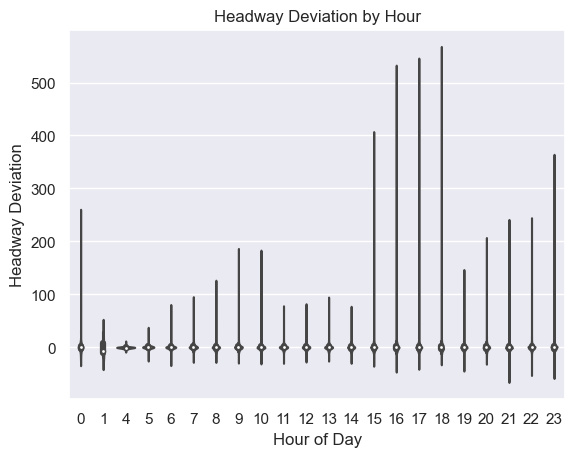

In [79]:
#This violin chart shows the headway deviation per hour
sns.set_theme(style="darkgrid")
sns.violinplot(x=wego['datehour'], y=wego['HDWY_DEV'])
plt.xlabel('Hour of Day')
plt.ylabel('Headway Deviation')
plt.title('Headway Deviation by Hour')
plt.show()

In [75]:
wego.info()

<class 'pandas.core.frame.DataFrame'>
Index: 265890 entries, 311018 to 350327
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   CALENDAR_ID                265890 non-null  int64         
 1   SERVICE_ABBR               265890 non-null  int64         
 2   ADHERENCE_ID               265890 non-null  int64         
 3   DATE                       265890 non-null  datetime64[ns]
 4   ROUTE_ABBR                 265890 non-null  int64         
 5   BLOCK_ABBR                 265890 non-null  int64         
 6   OPERATOR                   265890 non-null  int64         
 7   TRIP_ID                    265890 non-null  int64         
 8   OVERLOAD_ID                265890 non-null  int64         
 9   ROUTE_DIRECTION_NAME       265890 non-null  object        
 10  TIME_POINT_ABBR            265890 non-null  object        
 11  ROUTE_STOP_SEQUENCE        265885 non-null  float64 

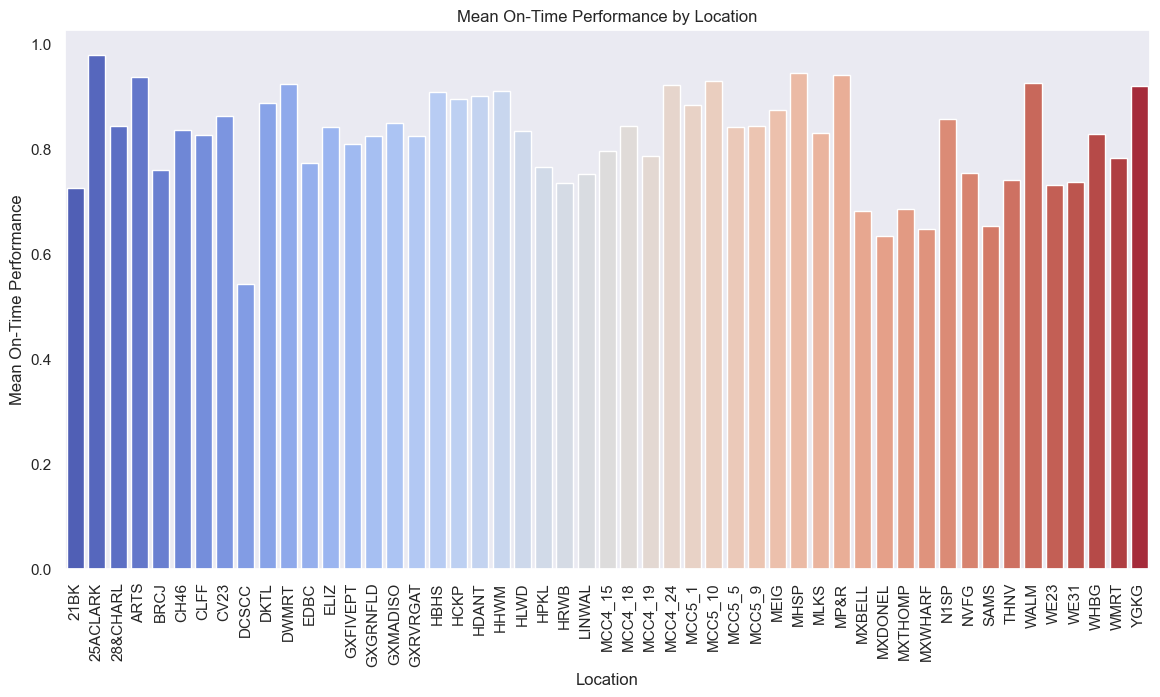

In [76]:
mean_on_time_performance = wego.groupby('TIME_POINT_ABBR')['ADJUSTED_ONTIME_COUNT'].mean().reset_index()
plt.figure(figsize=(14, 7))
sns.barplot(data=mean_on_time_performance, x='TIME_POINT_ABBR', y='ADJUSTED_ONTIME_COUNT', palette='coolwarm')
plt.title('Mean On-Time Performance by Location')
plt.xlabel('Location')
plt.ylabel('Mean On-Time Performance')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()
#This is location effect on mean on time performance. Does it seem accurate? Should we try this in a scatter plot?

### How much of a factor does the driver have on headway and on-time performance? The driver is indicated by the OPERATOR variable.

In [77]:
filter_df(wego,'ROUTE_NAME','Hillsboro','Bordeaux')

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,hdwy_dev_pct,DAYS_OF_THE_WEEK,datehour
310178,120230924,3,100216252,2023-09-24,22,2202,2689,350207,0,TO DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,Bordeaux,7.777777,Sunday,20
310177,120230924,3,100216251,2023-09-24,22,2202,2689,350207,0,TO DOWNTOWN,...,1,1,1.0,0,0.000000,NaN,Bordeaux,-4.666667,Sunday,20
310175,120230924,3,100216249,2023-09-24,22,2202,2689,350206,0,FROM DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,Bordeaux,-0.138890,Sunday,20
310174,120230924,3,100216248,2023-09-24,22,2202,2689,350206,0,FROM DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,Bordeaux,0.972222,Sunday,20
310173,120230924,3,100216247,2023-09-24,22,2202,2689,350206,0,FROM DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,Bordeaux,3.666667,Sunday,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309727,120230923,2,100196866,2023-09-23,7,700,2584,353278,0,FROM DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,Hillsboro,-15.833333,Saturday,9
309729,120230923,2,100196868,2023-09-23,7,700,2584,353279,0,TO DOWNTOWN,...,1,0,0.0,0,24.516666,24.0,Hillsboro,0.833333,Saturday,10
309720,120230923,2,100196859,2023-09-23,7,700,2584,353276,0,FROM DOWNTOWN,...,1,0,0.0,0,15.900000,12.0,Hillsboro,-0.722223,Saturday,7
309868,120230923,2,100197011,2023-09-23,7,702,3102,353430,0,TO DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,Hillsboro,-0.444447,Saturday,9


### Is there any relationship between lateness (ADHERENCE) and headway deviation?

## Stretch Goals:

##### These are the coordinates for the center of nashville: 
  36.1627° N, 86.7816° Wa

In [ ]:
neighborhoods = pd.read_csv("../data/Neighborhood_Boundaries_20240522.csv")
neighborhoods.head()

In [ ]:
# Read the CSV file containing multipolygons into a Geopandas DataFrame
neighborhoods = gpd.read_file('../data/Neighborhood_Boundaries_20240522.csv')

# Read your other dataset into another Geopandas DataFrame
wego_geo = gpd.GeoDataFrame(route_locations, 
                           crs="EPSG:2204", 
                           geometry = gpd.points_from_xy(route_locations.LONGITUDE, route_locations.LATITUDE))

# Iterate over the rows of your_data_df
for index, row in wego_geo.iterrows():
    # Access the geometry column of your data
    geometry = row['geometry']
    
    # Iterate over the multipolygons and check for intersection
    for mp in neighborhoods.geometry:
        if geometry.intersects(mp):
            # Do something if the geometry intersects with a multipolygon
            print("Intersection found!")
            break  # If you only want to know if there is an intersection, you can break here

In [ ]:
#Read in neighborhood csv and convert to geodataframe
neighborhoods = pd.read_csv("../data/Neighborhood_Boundaries_20240522.csv")
geo_neighborhoods = gpd.GeoDataFrame(neighborhoods, 
                           crs="EPSG:2204", 
                           geometry = gpd.points_from_xy(neighborhoods.LONGITUDE, neighborhoods.LATITUDE))
type(wego_geo)

In [ ]:
#First bring in only the columns we need: 
route_locations = wego[['ROUTE_NAME', 'ROUTE_STOP_SEQUENCE', 'LATITUDE', 'LONGITUDE']].sort_values(by=['ROUTE_NAME','ROUTE_STOP_SEQUENCE'], ascending=[True,True])

In [ ]:
#Use geopandas function GeoDataFrame to convert it to a geodataframe
wego_geo = gpd.GeoDataFrame(route_locations, 
                           crs="EPSG:2204", 
                           geometry = gpd.points_from_xy(route_locations.LONGITUDE, route_locations.LATITUDE))
wego_geo


In [ ]:
# Define the center coordinates as a Shapely Point
centerpoint = Point(-86.7816, 36.1627)

# Create a GeoSeries for the center point
center = gpd.GeoSeries([centerpoint], crs='EPSG:2204')

In [ ]:
#Convert both the dataframe and the center point to 2204 crs
center = center.to_crs(epsg=2204)
wego = wego_geo.to_crs(epsg=2204)

In [ ]:
#distance_column = gdf['geometry'].distance(point_to_compare)
wego_geo['dist_from_center'] = wego_geo['geometry'].distance(centerpoint)
wego_geo.dist_from_center.unique()

In [ ]:
#center = Point(36.1627,86.7816)
#center = center.to_crs(epsg=3857)
#wego_converted = wego_geo.to_crs(epsg=3857)
#wego_converted['dist_from_center'] = wego_converted['geometry'].distance(center)
#wego_converted


# Convert the center point to the same projected CRS (EPSG:3857)
#center_projected = center.to_crs(epsg=3857).iloc[0]

# Convert the GeoDataFrame to the projected CRS (EPSG:3857)
#wego_converted = wego_geo.to_crs(epsg=3857)

# Calculate distance to the center point and add as a new column
#wego_converted['dist_from_center'] = wego_converted['geometry'].distance(center_projected)

# Display the DataFrame
#print(wego_converted)

In [ ]:
wego_geo.rename(columns={'dist_from_center': 'dist_from_center_in_miles'}, inplace=True)
wego_geo

In [ ]:
center = (36.1627,86.7816)
wego_geo.distance(center_coordinates)

center = gpd.GeoDataFrame({'geometry': [pnt1, pnt2]}, crs='EPSG:4326')
points_df = points_df.to_crs('EPSG:5234')
points_df2 = points_df.shift() #We shift the dataframe by 1 to align pnt1 with pnt2
points_df.distance(points_df2)

### How much impact does being late or too spaced out at the first stop have downstream?

### What is the impact of the layover at the start of the trip (the difference between the first stop arrival and departure time)? 

### Does more dwell time at the beginning of a trip lead to more stable headways (lower values for % headway deviation)?

### Do trips with longer scheduled layover time have more stable headway values?

### What is the relationship between distance or time traveled since the start of a given trip and the headway deviation?

### Does headway become less stable the further along the route the bus has traveled?